In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [12]:
df = pd.read_csv("/Users/namanlabhsetwar/Desktop/Sem 5 Practical/ML- Lab Assignments/LP-1 Dataset/Decision Tree & Naive Bayes Classification/madfhantr.csv")

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:

# Step 1: Data Pre-processing
# Handle missing values and encode categorical variables
df['Dependents'] = df['Dependents'].replace('3+', 3)  # Convert '3+' to 3
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])  # Convert '3+' to 3
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [16]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
# Label encoding for categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])


In [26]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,Y
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,Y
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,Y
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,Y


In [28]:
# Step 2: Split the data into features and target variable
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Step 3: Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [29]:

# Step 4: Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
# Step 5: Make predictions on the testing set
y_pred = dt_classifier.predict(X_test)

In [30]:

# Step 6: Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f'Accuracy: {accuracy *100} %')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 70.12987012987013 %
Confusion Matrix:
[[29 25]
 [21 79]]
Classification Report:
              precision    recall  f1-score   support

           N       0.58      0.54      0.56        54
           Y       0.76      0.79      0.77       100

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.70      0.70      0.70       154



<Axes: >

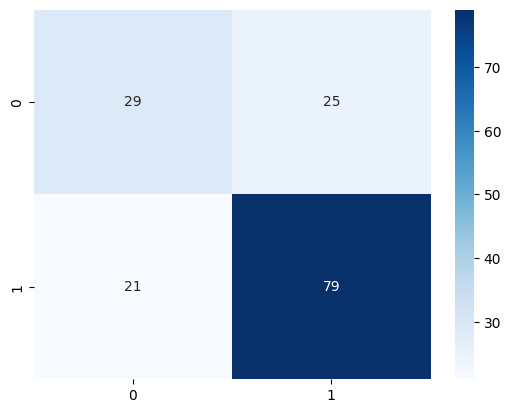

In [32]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, cmap='Blues')